https://www.kaggle.com/c/digit-recognizer/overview

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

train_path = "/content/drive/MyDrive/Data/Digit Recognizer/train.csv"
test_path = "/content/drive/MyDrive/Data/Digit Recognizer/test.csv"
root_path = "/content/drive/MyDrive/Data/Digit Recognizer/"

In [ ]:
train = pd.read_csv(train_path)
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train.drop('label',axis=1)
y = train['label']
print(X.shape)
print(y.value_counts())

(42000, 784)
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=1)

In [ ]:

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
print(X_train.shape)

(33600, 28, 28, 1)


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True
)

#Model-01

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
import pickle
from tensorflow import keras

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [ ]:
if os.path.exists(os.path.join(root_path,"model-01.h5")):
  model = keras.models.load_model(os.path.join(root_path,"model-01.h5"))
if not os.path.exists(os.path.join(root_path,"model-01.h5")):
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
  history = model.fit(X_train,y_train,batch_size=128,epochs=100,callbacks=[early_stopping],validation_data=(X_test,y_test))
  model.save(os.path.join(root_path,"model-01.h5"))
  with open(os.path.join(root_path,"model-01-history"),'wb') as file_pi:
    pickle.dump(history.history,file_pi)

In [ ]:
_, eval_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"In train evaluation: {eval_acc}\n")
_, eval_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Best accuracy in evaluation: {eval_acc}\n")

In train evaluation: 0.9965476393699646

Best accuracy in evaluation: 0.9897618889808655



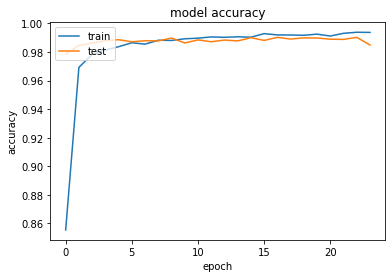

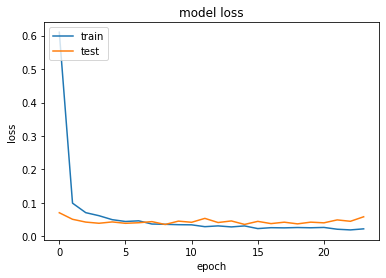

In [ ]:
history = pickle.load(open(os.path.join(root_path,"model-01-history"), "rb"))
import matplotlib.pyplot as plt

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Model-02

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
if os.path.exists(os.path.join(root_path,"model-02.h5")):
  model = keras.models.load_model(os.path.join(root_path,"model-02.h5"))
if not os.path.exists(os.path.join(root_path,"model-02.h5")):
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
  history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=128),epochs=100,callbacks=[early_stopping,learning_rate_reduction]
                                ,steps_per_epoch=X_train.shape[0]/128,validation_data=(X_test,y_test))
  model.save(os.path.join(root_path,"model-02.h5"))
  with open(os.path.join(root_path,"model-02-history"),'wb') as file_pi:
    pickle.dump(history.history,file_pi)

In [ ]:
_, eval_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"In train evaluation: {eval_acc}\n")
_, eval_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Best accuracy in evaluation: {eval_acc}\n")

In train evaluation: 0.998452365398407

Best accuracy in evaluation: 0.992976188659668



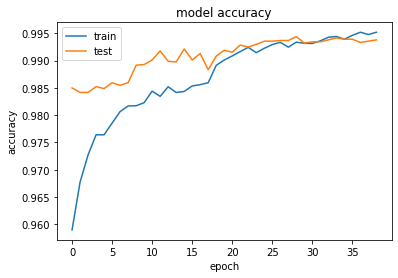

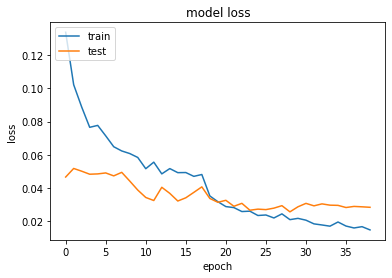

In [ ]:
history = pickle.load(open(os.path.join(root_path,"model-02-history"), "rb"))
import matplotlib.pyplot as plt

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Model-03

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

In [ ]:
if os.path.exists(os.path.join(root_path,"model-03.h5")):
  model = keras.models.load_model(os.path.join(root_path,"model-03.h5"))
if not os.path.exists(os.path.join(root_path,"model-03.h5")):
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
  history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=128),epochs=100,callbacks=[early_stopping,learning_rate_reduction]
                                ,steps_per_epoch=X_train.shape[0]/128,validation_data=(X_test,y_test))
  model.save(os.path.join(root_path,"model-03.h5"))
  with open(os.path.join(root_path,"model-03-history"),'wb') as file_pi:
    pickle.dump(history.history,file_pi)

In [ ]:
_, eval_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"In train evaluation: {eval_acc}\n")
_, eval_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Best accuracy in evaluation: {eval_acc}\n")

In train evaluation: 0.9972916841506958

Best accuracy in evaluation: 0.9941666722297668



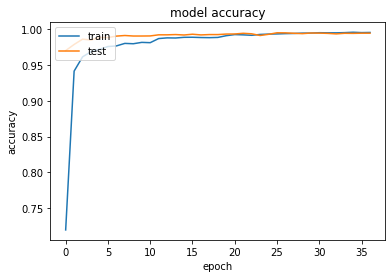

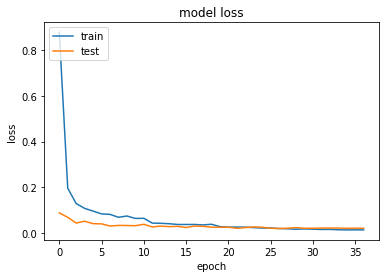

In [ ]:
history = pickle.load(open(os.path.join(root_path,"model-03-history"), "rb"))
import matplotlib.pyplot as plt

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Model-04

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

In [ ]:
if os.path.exists(os.path.join(root_path,"model-04.h5")):
  model = keras.models.load_model(os.path.join(root_path,"model-04.h5"))
if not os.path.exists(os.path.join(root_path,"model-04.h5")):
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
  history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=128),epochs=100,callbacks=[early_stopping,learning_rate_reduction]
                                ,steps_per_epoch=X_train.shape[0]/128,validation_data=(X_test,y_test))
  model.save(os.path.join(root_path,"model-04.h5"))
  with open(os.path.join(root_path,"model-04-history"),'wb') as file_pi:
    pickle.dump(history.history,file_pi)

In [ ]:
_, eval_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"In train evaluation: {eval_acc}\n")
_, eval_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Best accuracy in evaluation: {eval_acc}\n")

In train evaluation: 0.9985119104385376

Best accuracy in evaluation: 0.9944047331809998



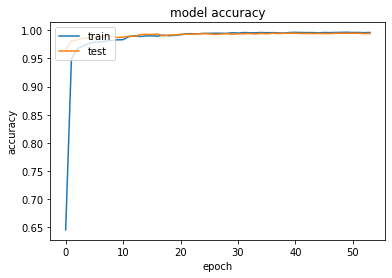

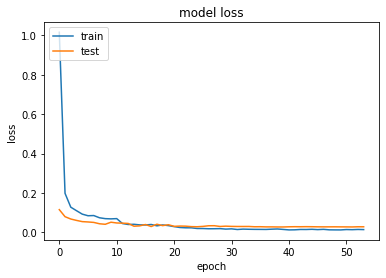

In [ ]:
history = pickle.load(open(os.path.join(root_path,"model-04-history"), "rb"))
import matplotlib.pyplot as plt

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Model-05 


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

In [ ]:
if os.path.exists(os.path.join(root_path,"model-05.h5")):
  model = keras.models.load_model(os.path.join(root_path,"model-05.h5"))
if not os.path.exists(os.path.join(root_path,"model-05.h5")):
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
  history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=128),epochs=100,callbacks=[early_stopping,learning_rate_reduction]
                                ,steps_per_epoch=X_train.shape[0]/128,validation_data=(X_test,y_test))
  model.save(os.path.join(root_path,"model-05.h5"))
  with open(os.path.join(root_path,"model-05-history"),'wb') as file_pi:
    pickle.dump(history.history,file_pi)

In [ ]:
_, eval_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"In train evaluation: {eval_acc}\n")
_, eval_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Best accuracy in evaluation: {eval_acc}\n")

In train evaluation: 0.9979761838912964

Best accuracy in evaluation: 0.9942857027053833



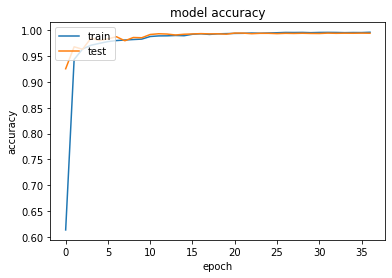

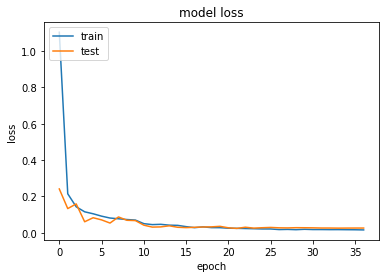

In [ ]:
history = pickle.load(open(os.path.join(root_path,"model-05-history"), "rb"))
import matplotlib.pyplot as plt

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Model-06

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [ ]:
if os.path.exists(os.path.join(root_path,"model-06.h5")):
  model = keras.models.load_model(os.path.join(root_path,"model-06.h5"))
if not os.path.exists(os.path.join(root_path,"model-06.h5")):
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
  history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=128),epochs=100,callbacks=[early_stopping,learning_rate_reduction]
                                ,steps_per_epoch=X_train.shape[0]/128,validation_data=(X_test,y_test))
  model.save(os.path.join(root_path,"model-06.h5"))
  with open(os.path.join(root_path,"model-06-history"),'wb') as file_pi:
    pickle.dump(history.history,file_pi)

In [ ]:
_, eval_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"In train evaluation: {eval_acc}\n")
_, eval_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Best accuracy in evaluation: {eval_acc}\n")

In train evaluation: 0.9983928799629211

Best accuracy in evaluation: 0.9946428537368774



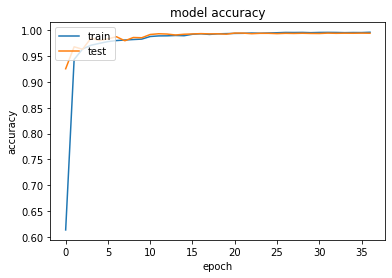

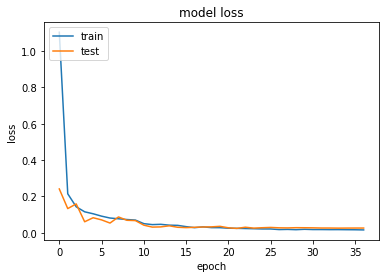

In [ ]:
history = pickle.load(open(os.path.join(root_path,"model-05-history"), "rb"))
import matplotlib.pyplot as plt

plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Model-07

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [ ]:
if os.path.exists(os.path.join(root_path,"model-07.h5")):
  model = keras.models.load_model(os.path.join(root_path,"model-07.h5"))
if not os.path.exists(os.path.join(root_path,"model-07.h5")):
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
  history = model.fit(X_train,y_train,batch_size=128,epochs=100,callbacks=[early_stopping],validation_data=(X_test,y_test))
  model.save(os.path.join(root_path,"model-07.h5"))
  with open(os.path.join(root_path,"model-07-history"),'wb') as file_pi:
    pickle.dump(history.history,file_pi)

In [ ]:
_, eval_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"In train evaluation: {eval_acc}\n")
_, eval_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Best accuracy in evaluation: {eval_acc}\n")

In train evaluation: 0.9993749856948853

Best accuracy in evaluation: 0.993571400642395



#Model-08

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',  activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))

In [ ]:
if os.path.exists(os.path.join(root_path,"model-08.h5")):
  model = keras.models.load_model(os.path.join(root_path,"model-08.h5"))
if not os.path.exists(os.path.join(root_path,"model-08.h5")):
  model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
  history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=128),epochs=100,callbacks=[early_stopping,learning_rate_reduction]
                                ,steps_per_epoch=X_train.shape[0]/128,validation_data=(X_test,y_test))
  model.save(os.path.join(root_path,"model-08.h5"))
  with open(os.path.join(root_path,"model-08-history"),'wb') as file_pi:
    pickle.dump(history.history,file_pi)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
262/262 [==============================] - 11s 38ms/step - loss: 0.1586 - accuracy: 0.9618 - val_loss: 0.0367 - val_accuracy: 0.9907
Epoch 2/100
262/262 [==============================] - 10s 36ms/step - loss: 0.0597 - accuracy: 0.9823 - val_loss: 0.0272 - val_accuracy: 0.9927
Epoch 3/100
262/262 [==============================] - 10s 36ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.0285 - val_accuracy: 0.9921
Epoch 4/100
262/262 [==============================] - 10s 38ms/step - loss: 0.0466 - accuracy: 0.9868 - val_loss: 0.0283 - val_accuracy: 0.9930
Epoch 5/100
262/262 [==============================] - 10s 38ms/step - loss: 0.0414 - accuracy: 0.9879 - val_loss: 0.0272 - val_accuracy: 0.9919
Epoch 6/100
262/262 [==============================] - 10s 37ms/step - loss: 0.0415 - accuracy: 0.9862 - val_loss: 0.0274 - val_accuracy: 0.9924
Epoch 7/100
262/262 [==============================] - 10s 38ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0240 - val_ac

In [ ]:
_, eval_acc = model.evaluate(X_train, y_train, verbose=0)
print(f"In train evaluation: {eval_acc}\n")
_, eval_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Best accuracy in evaluation: {eval_acc}\n")

In train evaluation: 0.9990476369857788

Best accuracy in evaluation: 0.9954761862754822



#Test

In [ ]:
test1 = pd.read_csv(test_path)
test = test1.values.reshape(-1,28,28,1)

result = model.predict(test)
result = np.argmax(result,axis=1)
result

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
submission = pd.DataFrame({
        "ImageId": test1.index+1,
        "Label": result
    })
submission.to_csv('submission.csv', index=False)
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
